# Price Action Analysis

### Nordic American Tankers Ltd. (NAT)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [8]:
df = pd.read_csv('C:\\Users\\Galaxy Computers\\Downloads\\NAT.csv',parse_dates=['Date'])

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-06,2.63,2.74,2.54,2.63,2.318717,6391600
1,2022-10-07,2.61,2.77,2.61,2.71,2.389249,5316700
2,2022-10-10,2.71,2.82,2.60,2.61,2.301084,3602100
3,2022-10-11,2.56,2.64,2.49,2.61,2.301084,4220400
4,2022-10-12,2.61,2.75,2.55,2.73,2.406881,4343100


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2023-10-02,4.11,4.17,3.94,3.94,3.94,3343400
248,2023-10-03,3.93,3.97,3.84,3.91,3.91,2362700
249,2023-10-04,3.88,3.89,3.79,3.85,3.85,2260200
250,2023-10-05,3.88,4.01,3.87,4.00,4.00,2749300
251,2023-10-06,3.96,4.08,3.95,4.05,4.05,2064453


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,3.622460,3.706627,3.542500,3.623135,3.362639,3.258058e+06
std,0.419979,0.418328,0.415298,0.415666,0.475855,1.616848e+06
min,2.560000,2.640000,2.490000,2.610000,2.301084,1.089200e+06
25%,3.337500,3.430000,3.227500,3.330000,2.965532,2.160950e+06
50%,3.640000,3.750000,3.580000,3.645000,3.369968,2.825200e+06
75%,3.920000,3.990000,3.817500,3.912500,3.722670,3.891800e+06
max,4.520000,4.650000,4.430000,4.540000,4.279241,1.092990e+07


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


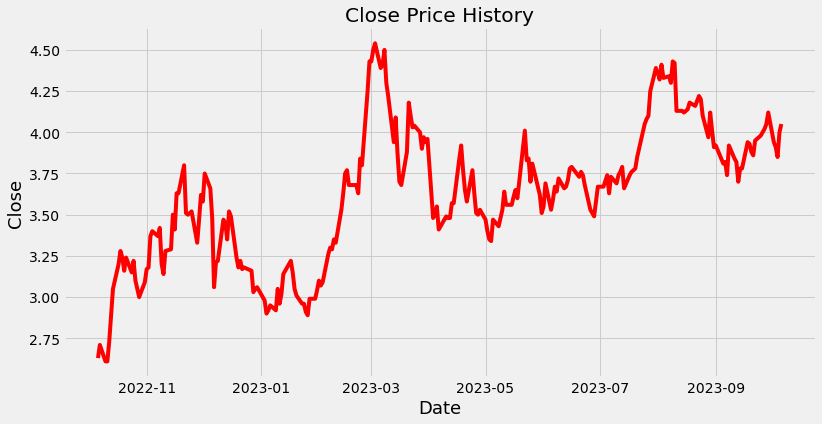

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'],color='red')
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)

plt.show()

In [43]:
data =df.filter(['Close'])
dataset = data.values
traning_data_len = math.ceil(len(dataset)*.8)
traning_data_len

202

In [44]:
#SclaScale the data
scale = MinMaxScaler(feature_range=(0,1))
scaled_data = scale.fit_transform(dataset)
scaled_data

array([[0.01036269],
       [0.05181347],
       [0.        ],
       [0.        ],
       [0.06217617],
       [0.14507772],
       [0.22797927],
       [0.30569948],
       [0.34715026],
       [0.32642487],
       [0.28497409],
       [0.32642487],
       [0.27979275],
       [0.31606218],
       [0.25388601],
       [0.22797927],
       [0.20207254],
       [0.24870466],
       [0.29015544],
       [0.29533679],
       [0.39378238],
       [0.40932642],
       [0.39378238],
       [0.41968912],
       [0.30569948],
       [0.2746114 ],
       [0.34715026],
       [0.35233161],
       [0.4611399 ],
       [0.41450777],
       [0.52849741],
       [0.52849741],
       [0.61658031],
       [0.46632124],
       [0.4611399 ],
       [0.47150259],
       [0.37305699],
       [0.44559585],
       [0.52331606],
       [0.50259067],
       [0.59067358],
       [0.54404145],
       [0.4507772 ],
       [0.23316062],
       [0.31088083],
       [0.31606218],
       [0.44559585],
       [0.435

In [50]:
train_data = scaled_data[0:traning_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01036269, 0.05181347, 0.        , 0.        , 0.06217617,
       0.14507772, 0.22797927, 0.30569948, 0.34715026, 0.32642487,
       0.28497409, 0.32642487, 0.27979275, 0.31606218, 0.25388601,
       0.22797927, 0.20207254, 0.24870466, 0.29015544, 0.29533679,
       0.39378238, 0.40932642, 0.39378238, 0.41968912, 0.30569948,
       0.2746114 , 0.34715026, 0.35233161, 0.4611399 , 0.41450777,
       0.52849741, 0.52849741, 0.61658031, 0.46632124, 0.4611399 ,
       0.47150259, 0.37305699, 0.44559585, 0.52331606, 0.50259067,
       0.59067358, 0.54404145, 0.4507772 , 0.23316062, 0.31088083,
       0.31606218, 0.44559585, 0.43523316, 0.38341969, 0.47150259,
       0.45595855, 0.32642487, 0.29533679, 0.31606218, 0.29015544,
       0.29533679, 0.28497409, 0.21761658, 0.22797927, 0.23316062])]
[0.1917098445595855]



In [51]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [56]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(142, 60, 1)

In [58]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))  # Added the missing closing parenthesis here
model.add(Dense(25))
model.add(Dense(1)) 
          

In [59]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [60]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

142/142 [==============================] - 6s 22ms/step - loss: 0.0213


In [64]:
test_data = scaled_data[traning_data_len - 60:, :]

x_test = []
y_test = dataset[traning_data_len:, :]  # Assuming dataset contains your target values

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)


In [65]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(50, 60, 1)

In [66]:
predict = model.predict(x_test)
predict = scale.inverse_transform(predict)

2/2 [==============================] - 1s 11ms/step


In [67]:
#let's get RMSE
rmse = np.sqrt(np.mean(predict-y_test)**2)
rmse 

0.01872137298583981

In [69]:
#Plot the data
train = data[:traning_data_len]
valid = data[traning_data_len:]
valid['predict'] = predict

C:\Users\Galaxy Computers\AppData\Local\Temp\ipykernel_7592\2808688855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predict'] = predict


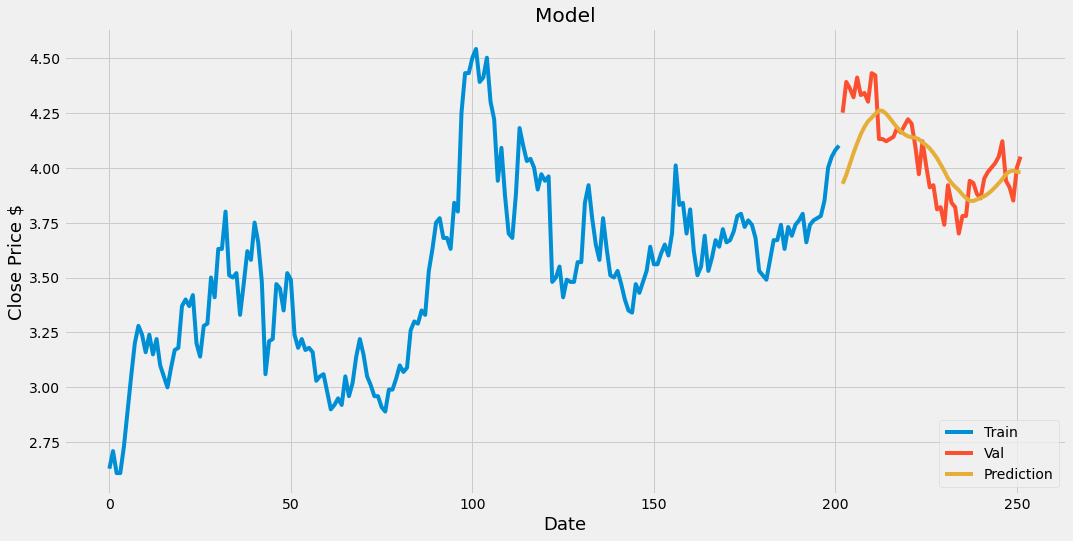

In [73]:
#Vizulation the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predict']])
plt.legend(['Train','Val','Prediction'], loc= 'lower right')